In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten

Load Dataset

In [2]:
X_train = np.loadtxt("input.csv", delimiter = ',')
Y_train = np.loadtxt("labels.csv", delimiter = ',')

X_test = np.loadtxt("input_test.csv", delimiter = ',')
Y_test = np.loadtxt("labels_test.csv", delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_train: ",Y_train.shape)
print("Shape of X_train: ",X_test.shape)
print("Shape of X_train: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of X_train:  (2000, 1)
Shape of X_train:  (400, 100, 100, 3)
Shape of X_train:  (400, 1)


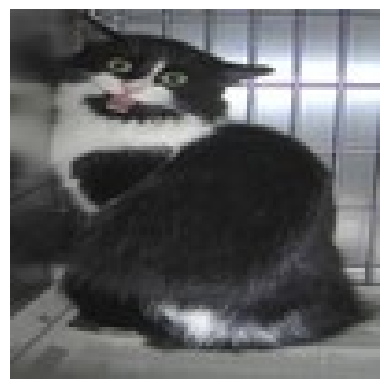

In [5]:
idx = random.randint(0,len(X_train) )
plt.imshow(X_train[idx,:])
plt.axis('off')  # Hide axes for better visualization
plt.show()

Model

In [6]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D (32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),


    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
    

])


C:\Users\Ketan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])

In [8]:
model.fit(X_train, Y_train, epochs = 20, batch_size = 64)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.5297 - loss: 0.7444
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6003 - loss: 0.6594
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6738 - loss: 0.5928
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7554 - loss: 0.5054
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.7910 - loss: 0.4567
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8329 - loss: 0.3813
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8862 - loss: 0.2824
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9270 - loss: 0.2212
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9527 - loss: 0.1715
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9449 - loss: 0.1526
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9783 - loss: 0.0846
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy:

In [9]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6753 - loss: 1.8207


[1.6262611150741577, 0.6825000047683716]

Making Predictions


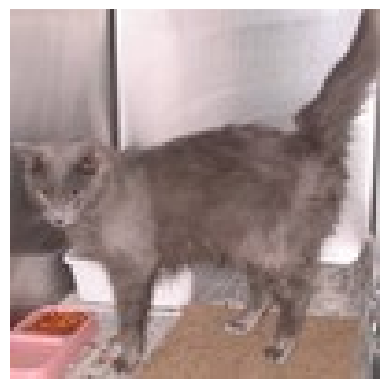

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Our model says it's a Cat


In [14]:
idx2 = random.randint(0, len(Y_test)-1)
plt.imshow(X_test[idx2, :])
plt.axis('off')
plt.show()

# Reshape the input sample and make a prediction
# Make a prediction for the sample at index idx2
Y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))

# Convert prediction to binary (True/False) based on a threshold
if Y_pred[0] < 0.5:  # Use < 0.5 for 'Dog'
    pred = 'Dog'
else:
    pred = 'Cat'

print("Our model says it's a", pred)